# SVR for Overland P04 & Overland P27

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# https://github.com/tomsharp/SVR/blob/master/SVR.ipynb
# https://github.com/amanjayedi/Machine-Learning-with-Python/blob/master/Regression/Support%20Vector%20Regression.ipynb
# https://towardsdatascience.com/unlocking-the-true-power-of-support-vector-regression-847fd123a4a0
# https://medium.datadriveninvestor.com/a-practical-guide-to-getting-started-with-machine-learning-3a6fcc0f95aa
# https://nvsyashwanth.github.io/machinelearningmaster/learning-curves/ (Learning curve)

In [4]:
df = pd.read_csv("/content/drive/MyDrive/_MIZZOU/_Resources_KIM+AMAN/DEV/CAADRIA 2022_Paper1/Experiment/FinalScripts_SVM/NewScript2022/OverlandP04ForSVR.csv")

In [5]:
df.head()
#len(df)

,T1_Depth,T2_Depth,T3_Depth,T1_Height_U,T2_Height_U,T3_Height_U,T1_Setback_FU,T2_Setback_FU,T3_Setback_FU,T1_Roof_Height,T2_Roof_Height,T3_Roof_Height,SolarRadiation
0,60,70,50,12,48,12,5,10,5,9,9,12,582.886839
1,70,60,50,12,36,24,10,10,10,9,12,9,655.262018
2,60,60,50,36,12,36,10,5,5,12,12,9,721.048065
3,70,60,60,36,24,12,10,10,10,9,9,9,654.008142
4,60,60,50,24,12,12,10,10,5,12,9,12,640.579075


In [6]:
# fig,ax = plt.subplots(6,2,figsize=(12,24))
# ax = ax.ravel()
# for i in range(12):
#     ax[i].scatter(df[df.columns[i]],df['SolarRadiation'],color='green',alpha=0.75)
#     ax[i].set_title(f"{df.columns[i]} vs. Solar Radiation",fontsize=14)
#     ax[i].grid(True)
# plt.show()

In [7]:
#Separate IVs and DVs
X = df[['T1_Depth','T2_Depth','T3_Depth','T1_Height_U','T2_Height_U','T3_Height_U','T1_Setback_FU','T2_Setback_FU','T3_Setback_FU','T1_Roof_Height','T2_Roof_Height','T3_Roof_Height']]
y = df['SolarRadiation']

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

# Split data and Random State

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
import seaborn as sns
plt.style.use('seaborn')

In [26]:
from sklearn.svm import SVR
# Array of random_state values from 0 to 400
random_states = np.arange(start=0, stop=1000)

# Initialize a list where we'll store the score of each random_state
scores = []

# Initialize search
for state in random_states:
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20, random_state=state)
    svr_linear = SVR(kernel='linear',gamma='scale', C=1.0, epsilon=0.1)
    svr_linear.fit(X_train,y_train)
    scores.append(svr_linear.score(X_test, y_test))

results = pd.DataFrame({'random_state':random_states, 'score':scores})
RandomState_df = results[results['score'] == results['score'].max()]
RandomState = RandomState_df.iloc[0][0].astype(int)
print("The best Random State Value of this dataset is:", RandomState)

The best Random State Value of this dataset is: 585


In [27]:
RandomState_df_min = results[results['score'] == results['score'].min()]
print(RandomState_df_min)
print(RandomState_df)


     random_state     score
613           613  0.907173
     random_state     score
585           585  0.979595


In [28]:
#export the random state data in csv
results.to_csv('/content/drive/MyDrive/_MIZZOU/_Resources_KIM+AMAN/DEV/CAADRIA 2022_Paper1/Experiment/FinalScripts_SVM/NewScript2022/ResultsBasedonRandomState.csv', encoding='utf-8')

# Spliting the data

In [29]:
#Using the random state number for further learning curve and predictions
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20, random_state=RandomState)

# Learning Curve

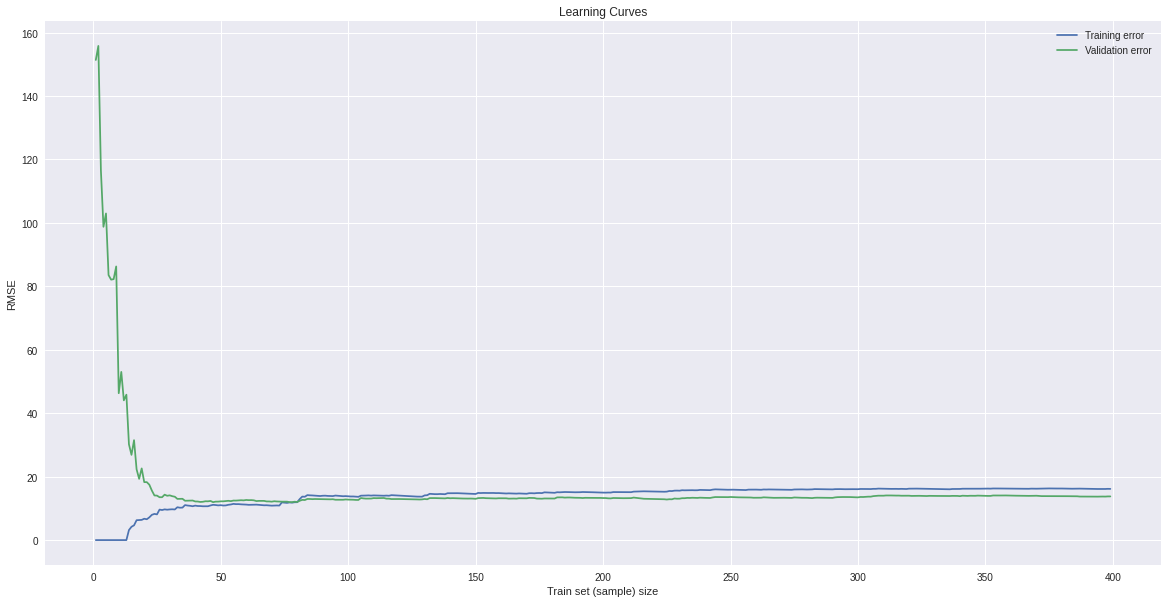

In [30]:
#Define the function


#Learning curve
# https://nvsyashwanth.github.io/machinelearningmaster/learning-curves/

regressor=LinearRegression()
regressor.fit(X_train,y_train)
predictions=regressor.predict(X_test)
plt.figure(1,figsize=(20,10))
train_errors=[]
val_errors=[]
#for i in range(1,10,1):
for i in range(1, len(X_train)):
    regressor.fit(X_train[:i],y_train[:i])
    train_preds=regressor.predict(X_train[:i])
    val_preds=regressor.predict(X_test)
    train_errors.append(mse(train_preds,y_train[:i]))
    val_errors.append(mse(val_preds,y_test))
plt.plot(range(1,len(X_train)),np.sqrt(train_errors),label='Training error')
plt.plot(range(1,len(X_train)),np.sqrt(val_errors),label='Validation error')
plt.title('Learning Curves')    
plt.xlabel('Train set (sample) size')
plt.ylabel('RMSE')
plt.legend()
plt.show()

***Learning Curve Meaning Example:*** We can see training & validation scores converge at a particular point. As seen in the image on the right, the first point of convergence w.r.t x-axis is about training sample size 10. This means that, beyond this point, the model will not benefit from increasing the training sample size. Considering the y-axis, the point of convergence is about RMSE value 1. Now, this is okay, and the model seems to generalize properly.

However, take an example where the value at the point of convergence corresponding to the y-axis is high (as seen in the image below). It shows that the model is suffering from high bias. This means that training & validation errors are high and the model doesn’t benefit from increasing the training sample size and thus results in underfitting.

On the other hand, if there was no visible point of convergence (as seen in the image below), this shows the model is having high variance and has less data. Meaning, the validation errors could be very high and the model would be overfitting.

***How to improve model performance?***
In the case of high bias, increase the number of features, or decrease the regularization parameter, thereby increasing the model complexity. 

In the case of high variance, decrease the number of features, or increase the regularization parameter, thereby decreasing the model complexity. To fill the gap, just increase the data you have (not the features).





# 5/10 fold cross validation (k-fold)
## Cross-validation is usually used in machine learning for improving model prediction (c and epsion)
### We can do a grid search of hyperparameters (with 5-fold cross-validation) to see if the test/validation score be improved

Evaluating a Machine Learning model can be quite tricky. Usually, we split the data set into training and testing sets and use the training set to train the model and testing set to test the model. We then evaluate the model performance based on an error metric to determine the accuracy of the model. This method however, is not very reliable as the accuracy obtained for one test set can be very different to the accuracy obtained for a different test set. K-fold Cross Validation(CV) provides a solution to this problem by dividing the data into folds and ensuring that each fold is used as a testing set at some point. 

K-Fold CV is where a given data set is split into a K number of sections/folds where each fold is used as a testing set at some point. Lets take the scenario of 5-Fold cross validation(K=5). Here, the data set is split into 5 folds. In the first iteration, the first fold is used to test the model and the rest are used to train the model. In the second iteration, 2nd fold is used as the testing set while the rest serve as the training set. This process is repeated until each fold of the 5 folds have been used as the testing set.

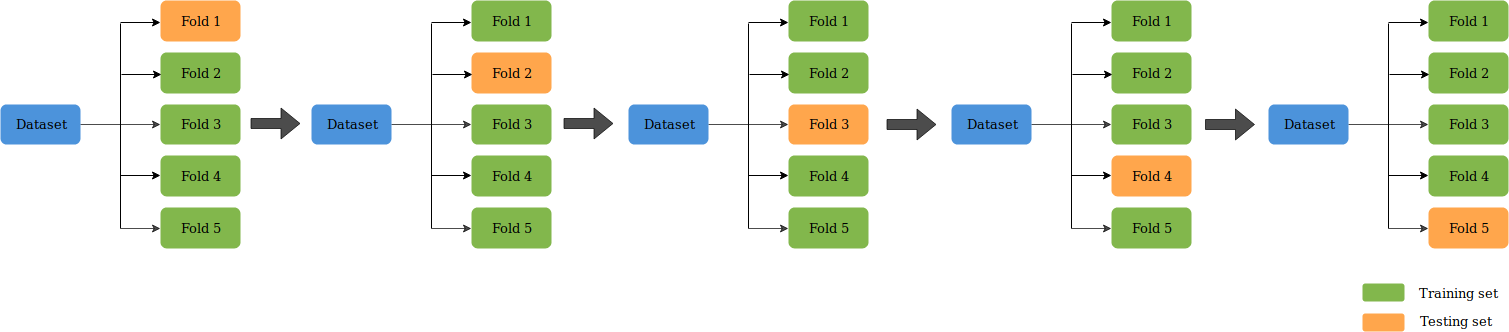

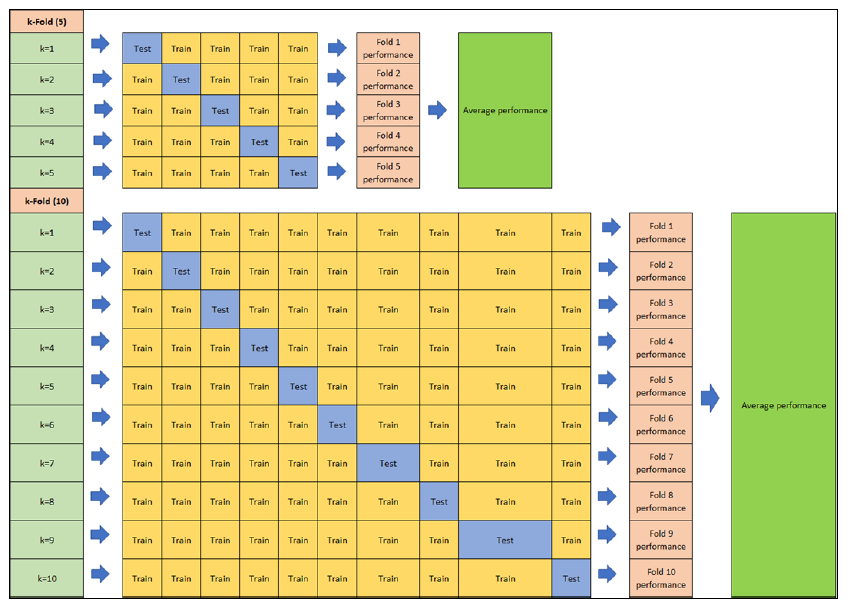

In [31]:
# https://github.com/amanjayedi/Machine-Learning-with-Python/blob/master/Regression/Support%20Vector%20Regression.ipynb
# https://medium.datadriveninvestor.com/k-fold-cross-validation-6b8518070833
# https://scikit-learn.org/stable/modules/cross_validation.html
# https://www.statology.org/k-fold-cross-validation/

In [32]:
from sklearn.model_selection import GridSearchCV
#params = {'C':[0.01,0.05,0.1,0.5,1,2,3,4,5],'epsilon':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
params = {'C':[0.01,0.05,0.1,0.5,1,5],'epsilon':[0.1,0.2,0.3,0.5,1]}

In [33]:
#Selecting the kernel
svr_linear = SVR(kernel='linear')
#Select the folds (c) 
grid = GridSearchCV(svr_linear,param_grid=params,cv=10,scoring='r2',verbose=1,return_train_score=True)
grid.fit(X_train,np.ravel(y_train,order="c"))

Fitting 10 folds for each of 30 candidates, totalling 300 fits


GridSearchCV(cv=10, estimator=SVR(kernel='linear'),
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 5],
                         'epsilon': [0.1, 0.2, 0.3, 0.5, 1]},
             return_train_score=True, scoring='r2', verbose=1)

In [34]:
# Check which was deemed best estimator by the grid search
grid.best_estimator_

SVR(C=0.1, epsilon=1, kernel='linear')

In [35]:
#Fit that estimator to the data
svr_best=SVR(kernel='linear',gamma='scale', C=0.1, epsilon=1)
svr_best.fit(X_train,np.ravel(y_train,order="c"))

SVR(C=0.1, epsilon=1, kernel='linear')

In [36]:
svr_best.score(X_test,y_test)

0.9732344258007705

In [37]:
from sklearn.metrics import mean_squared_error 
print("RMSE for Linear kernelized SVR:",np.sqrt(mean_squared_error(y_test,svr_best.predict(X_test))))

#R-squared is a relative measure of fit, RMSE is an absolute measure of fit. RMSE is a good measure of how accurately the model predicts the response, and it is the most important criterion for fit if the main purpose of the model is prediction.
#result suggests that the data is bad fit. RMSE is too high
#Try to play with other input variables (adding variables is the main problem?), and compare your RMSE values. The smaller the RMSE value, the better the model.

RMSE for Linear kernelized SVR: 13.967521782279462


# Final Prediction
### Use the random state, c and epsilon got from K-fold to improve the prediction result

In [41]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20, random_state=RandomState)

In [42]:
y_train = y_train.values.astype(float)
y_train = y_train.reshape(-1,1)

In [43]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X_train)
y = sc_y.fit_transform(y_train)

In [44]:
from sklearn.svm import SVR
#automatically selecting c and epsilon
svr_linear = SVR(kernel='linear',gamma='scale', C=.1, epsilon=1)
#svr_linear.fit(X_train, y_train) 
svr_linear.fit(X_train,np.ravel(y_train,order="c"))

SVR(C=0.1, epsilon=1, kernel='linear')

In [45]:
#rerun the prediction after getting the new c and epsilon values
y_pred = svr_linear.predict(X_test)
WriteData = pd.DataFrame({'Simulation Results (btu/hr-ft2)':y_test, 'Prediction Results (btu/hr-ft2)':y_pred})
print(WriteData)

     Simulation Results (btu/hr-ft2)  Prediction Results (btu/hr-ft2)
229                       550.899678                       553.498361
350                       800.400156                       790.487050
39                        659.441171                       660.993097
106                       745.433161                       716.907437
447                       565.916970                       567.854529
..                               ...                              ...
351                       565.244276                       569.728380
483                       678.670291                       697.601881
169                       782.520182                       777.197415
84                        670.100216                       690.723378
50                        666.208579                       671.395026

[100 rows x 2 columns]


In [46]:
mae=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
R_square = metrics.r2_score(y_test, y_pred)
# Printing the metrics
print('R2 square:',R_square)
print('MAE: ', mae)
print('MSE: ', mse)
print('RMSE: ', rmse)

R2 square: 0.9732344258007705
MAE:  10.088888900272579
MSE:  195.09166473845124
RMSE:  13.967521782279462


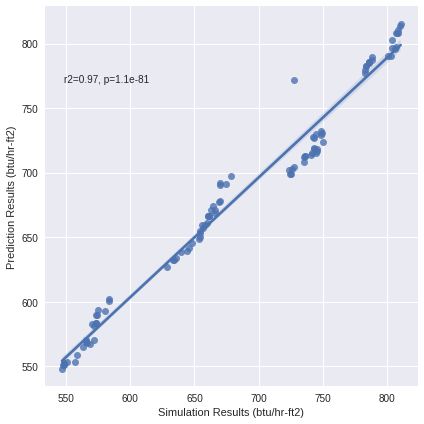

In [47]:
#Plot
import seaborn as sns
import scipy as sp

g = sns.lmplot(x='Simulation Results (btu/hr-ft2)', y='Prediction Results (btu/hr-ft2)', data=WriteData, height=6, aspect=1)

def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data['Simulation Results (btu/hr-ft2)'], data['Prediction Results (btu/hr-ft2)'])
    ax = plt.gca()
    ax.text(.05, .8, 'r2={:.2f}, p={:.2g}'.format(R_square, p),
            transform=ax.transAxes)
    
g.map_dataframe(annotate)
plt.show()

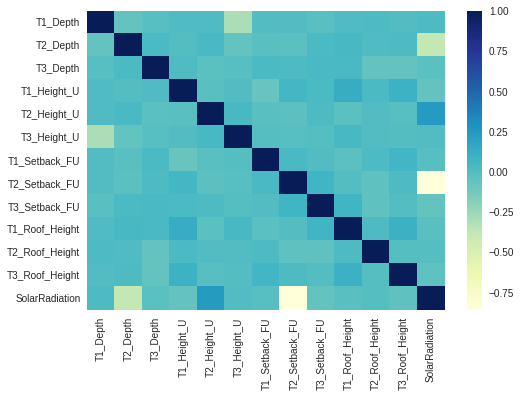

In [30]:
#Visualise the data
plt.figure()
# plot using a color palette
sns.heatmap(df.corr(), cmap="YlGnBu")
plt.show()

# Write the data into csv file

In [48]:
#export the data in csv
WriteData.to_csv('/content/drive/MyDrive/_MIZZOU/_Resources_KIM+AMAN/DEV/CAADRIA 2022_Paper1/Experiment/FinalScripts_SVM/NewScript2022/PredictionResult_OverlandP04.csv', encoding='utf-8')